# Assignment №4 

In [1]:
import pandas as pd

### [Data source](https://www.kaggle.com/rodsaldanha/arketing-campaign)

In [2]:
df1 = pd.read_csv("marketing_campaign_1.csv")
df2 = pd.read_csv("marketing_campaign_2.csv")

## Merging of 2 datasets:

In [3]:
df = pd.concat([df1, df2], axis=0, ignore_index = True)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3


In [22]:
import numpy as np
df["Education"].astype("category")

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: category
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

## Number of different dates:

In [5]:
df["Dt_Customer"].unique().size

663

## Descriptive statistics:

In [6]:
def mode(df):
    return df.mode()[0]
def quantile_25(df):
    return df.quantile(q = 0.25)
def quantile_50(df):
    return df.quantile(q = 0.50)
def quantile_75(df):
    return df.quantile(q = 0.75)
def Conf_interval_95(df):
    return (round(df.mean() - df.sem() * 1.96, 2) , round(df.mean() + df.sem() * 1.96, 2))

In [7]:
df[["Year_Birth", "Income","Kidhome", "Teenhome",
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
    "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", 
    "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
   ]].aggregate(['mean', 'sem', 'std', 'kurtosis', 'skew', 'max', 
                 'min', 'median', mode, quantile_25, quantile_50, quantile_75, Conf_interval_95 ])

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
mean,1968.81,52247.3,0.444196,0.50625,303.936,26.3022,166.95,37.5254,27.0629,44.0219,2.325,4.08482,2.66205,5.79018,5.31652
sem,0.25321,534.751,0.0113757,0.0115055,7.11192,0.840367,4.76911,1.15425,0.87221,1.10224,0.040826,0.0587111,0.0617618,0.068689,0.0512722
std,11.9841,25173.1,0.538398,0.544538,336.597,39.7734,225.715,54.629,41.2805,52.1674,1.93224,2.77871,2.9231,3.25096,2.42665
kurtosis,0.717464,159.637,-0.779661,-0.986235,0.598744,4.05098,5.51672,3.09646,4.37655,3.55171,8.93691,5.70313,8.04744,-0.622048,1.82161
skew,-0.349944,6.76349,0.635288,0.407115,1.17577,2.10206,2.08323,1.91977,2.13608,1.88611,2.41857,1.38279,1.88099,0.702237,0.207926
max,1996,666666,2,2,1493,199,1725,259,263,362,15,27,28,13,20
min,1893,1730,0,0,0,0,0,0,0,0,0,0,0,0,0
median,1970,51381.5,0,0,173.5,8,67,12,8,24,2,4,2,5,6
mode,1976,7500,0,0,2,0,7,0,0,1,1,2,0,3,7
quantile_25,1959,35303,0,0,23.75,1,16,3,1,9,1,2,0,3,3


## Normal distribution (chosen observation - Year_Birth):

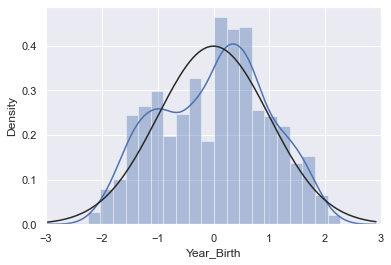

In [8]:
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();


data = df["Year_Birth"]
ax = sns.distplot(((data - data.mean()) / data.std()), fit = norm).set(xlim = (-3, 3))

## Percentage of elements located at a distance of one standard deviation from the average value:

In [9]:
df[(df["Year_Birth"] <= 1968.81 + 11.9841) & (df["Year_Birth"] >= 1968.81 - 11.9841)].shape[0] / df.shape[0]

0.6392857142857142

## Percentage of elements located at a distance of two standard deviation from the average value:

In [10]:
df[(df["Year_Birth"] <= 1968.81	 + 2 * 11.9841) & (df["Year_Birth"] >= 1968.81 - 2 * 11.9841)].shape[0] / df.shape[0]

0.9848214285714286

## Percentage of elements located at a distance of three standard deviation from the average value:

In [11]:
df[(df["Year_Birth"] <= 1968.81	 + 3 * 11.9841) & (df["Year_Birth"] >= 1968.81 - 3 * 11.9841)].shape[0] / df.shape[0]

0.9986607142857142

# Based on these data, we can conclude that the distribution is close to normal